In [1]:
import numpy as np
from skimage import io, filters, img_as_ubyte
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import napari

from particle.pipeline import SandHeap

In [67]:
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc')
labelsize = 16
plt.style.use("bmh")

In [3]:
sandHeap = SandHeap(source="./data/liutao/source1000-1500.npy",
                   se=ndi.generate_binary_structure(rank=3, connectivity=2), 
                   connectivity=1,
                   persistencePath='/home/chuan/',
                   cubeSize=64)
print(sandHeap.data.shape, sandHeap.data.dtype, sandHeap.status)

Function `_loadData` runs for 0h 0min 0.4s
(500, 1766, 1766) uint8 data-loaded


In [4]:
def plotFitCurve(frequency, binEnds):
    binCtr = [(binEnds[i]+binEnds[i+1])/2 for i in range(len(frequency))]

    frequency, binCtr = np.array(frequency), np.array(binCtr)
    mask = frequency > 0
    plt.plot(binCtr[mask], frequency[mask], '--')

In [14]:
def plotBar(freqs, bins, **kwargs):
    binCtrs = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
    plt.bar(binCtrs, freqs, **kwargs)

In [6]:
freqs, bins = [], []

Now plotting the histogram...
Plotting Complete!


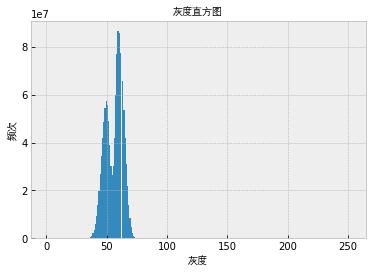

In [7]:
_ = sandHeap.drawHistogram()
freqs.append(_[0]);bins.append(_[1])
title = "灰度直方图"
plt.title(title, fontproperties=zhfont)
plt.xlabel("灰度", fontproperties=zhfont)
plt.ylabel("频次", fontproperties=zhfont)
plt.savefig(f"/home/chuan/直方图-原始.png", dpi=150)
io.imsave('/home/chuan/原始.png', sandHeap.data[450])

Function `equalizeHist` runs for 0h 0min 41.6s
Now plotting the histogram...
Plotting Complete!


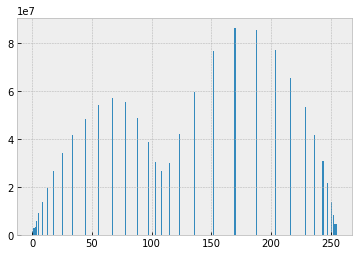

In [8]:
sandHeap.equalizeHist(draw=False)
io.imsave('/home/chuan/均衡.png', sandHeap.data[450])
_ = sandHeap.drawHistogram()
freqs.append(_[0]);bins.append(_[1])

findfont: Font family ['/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc'] not found. Falling back to DejaVu Sans.


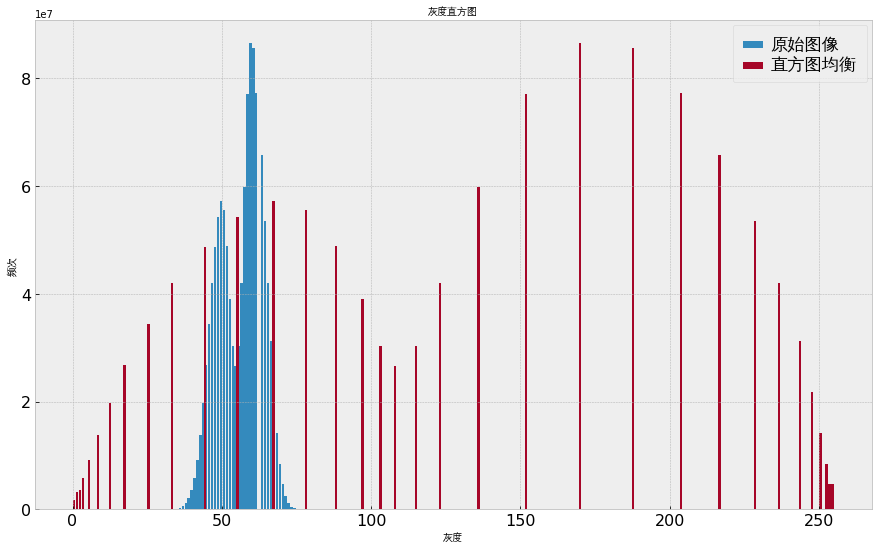

In [68]:
plt.figure(figsize=(15, 9))
plotBar(freqs[0], bins[0], label="原始图像")
# plotFitCurve(freqs[0], bins[0])
plotBar(freqs[1], bins[1], label="直方图均衡")
# plotFitCurve(freqs[1], bins[1])
title = "灰度直方图"
plt.title(title, fontproperties=zhfont)
plt.xlabel("灰度", fontproperties=zhfont)
plt.ylabel("频次", fontproperties=zhfont)
plt.tick_params(labelsize=labelsize)
plt.legend(fancybox=True, borderpad=1, prop=zhfont)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
# xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
plt.setp(ltext, fontsize='xx-large')
plt.savefig(f"/home/chuan/直方图-均衡.png", dpi=150)

Now plotting the histogram...
Plotting Complete!


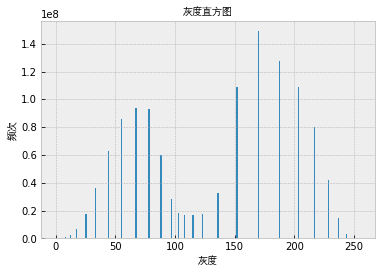

In [10]:
sandHeap.data = np.load('./data/liutao/v1/filtered.npy')
sandHeap.setStatus('filtered')
_ = sandHeap.drawHistogram()
freqs.append(_[0]);bins.append(_[1])
title = "灰度直方图"
plt.title(title, fontproperties=zhfont)
plt.xlabel("灰度", fontproperties=zhfont)
plt.ylabel("频次", fontproperties=zhfont)
plt.savefig(f"/home/chuan/直方图-滤波.png", dpi=150)
io.imsave('/home/chuan/滤波.png', sandHeap.data[450])

In [11]:
%%time
thrd = filters.threshold_otsu(sandHeap.data[sandHeap.circleMask])
print(thrd)

123
CPU times: user 5.35 s, sys: 1.5 s, total: 6.85 s
Wall time: 6.86 s


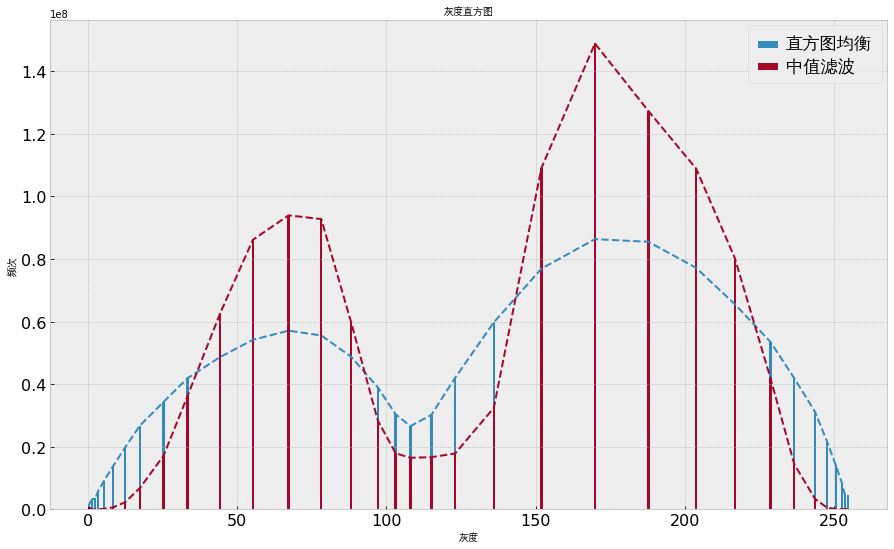

In [69]:
plt.figure(figsize=(15, 9))
plotBar(freqs[1], bins[1], label="直方图均衡")
plotFitCurve(freqs[1], bins[1])
plotBar(freqs[2], bins[2], label="中值滤波")
plotFitCurve(freqs[2], bins[2])
title = "灰度直方图"
plt.title(title, fontproperties=zhfont)
plt.xlabel("灰度", fontproperties=zhfont)
plt.ylabel("频次", fontproperties=zhfont)
plt.tick_params(labelsize=labelsize)
plt.legend(fancybox=True, borderpad=1, prop=zhfont)

# 增大图例字体
leg = plt.gca().get_legend()
ltext = leg.get_texts()
# xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
plt.setp(ltext, fontsize='xx-large')
plt.savefig(f"/home/chuan/直方图-滤波.png", dpi=150)

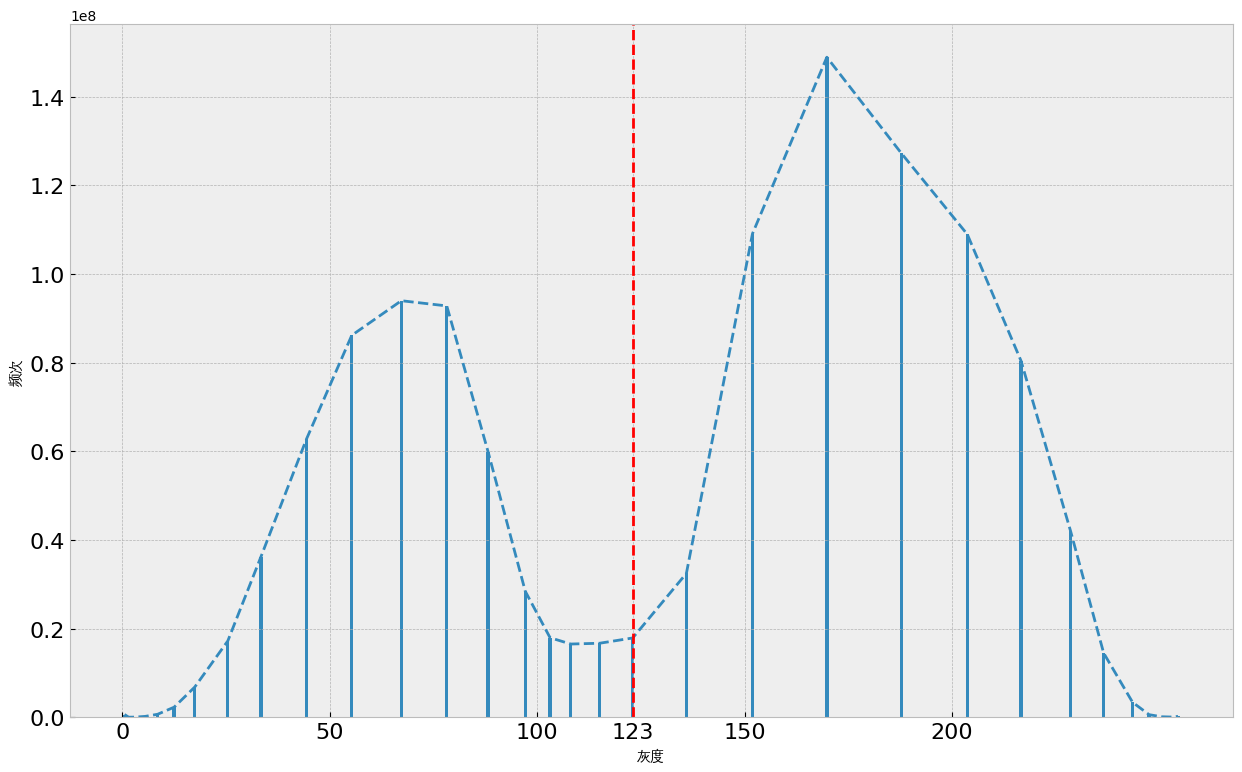

In [105]:
plt.style.use("bmh")
plt.figure(figsize=(15, 9))
plotBar(freqs[2], bins[2])
plotFitCurve(freqs[2], bins[2])
plt.axvline(thrd, color='r', linestyle ="--")
plt.xlabel("灰度", fontproperties=zhfont)
plt.ylabel("频次", fontproperties=zhfont)
plt.tick_params(labelsize=labelsize)
xticks = [i*50 for i in range(5)] + [123]
plt.xticks(xticks, xticks)
plt.savefig(f"/home/chuan/直方图-阈值.png", dpi=150)